In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import keras
from keras import models, layers
from keras import backend #딥러닝 엔진들의 함수를 직접 호출 또는 주요 파라미터를 제어

class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu')) #conv2D: 2차원 합성곱을 계산하는 클래스
        self.add(layers.MaxPooling2D(pool_size=(2, 2))) # 2차원 맥스풀링 (큰값만 뽑아옴)을 계산
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten()) # 다차원을 1차원으로 변환
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['accuracy'])

In [0]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

In [0]:
from keras import datasets 

class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
        

        input_shape = x_train.shape[1:]

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [0]:
import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()
    
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

In [0]:
def main():
    batch_size = 32
    epochs = 10

    data = DATA()
    model = CNN(data.input_shape, data.num_classes)

    history = model.fit(data.x_train, data.y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(data.x_test, data.y_test))

    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 21s 413us/step - loss: 1.5326 - acc: 0.4537 - val_loss: 1.2463 - val_acc: 0.5765
Epoch 2/10
50000/50000 [==============================] - 20s 401us/step - loss: 1.2385 - acc: 0.5768 - val_loss: 1.0729 - val_acc: 0.6277
Epoch 3/10
50000/50000 [==============================] - 20s 402us/step - loss: 1.1880 - acc: 0.5988 - val_loss: 1.0797 - val_acc: 0.6418
Epoch 4/10
50000/50000 [==============================] - 20s 405us/step - loss: 1.1699 - acc: 0.6083 - val_loss: 1.0726 - val_acc: 0.6463
Epoch 5/10
50000/50000 [==============================] - 20s 404us/step - loss: 1.1706 - acc: 0.6105 - val_loss: 1.0478 - val_acc: 0.6358
Epoch 6/10
50000/50000 [==============================] - 20s 405us/step - loss: 1.1766 - acc: 0.6124 - val_loss: 1.0205 - val_acc: 0.6603
Epoch 7/10
50000/50000 [==============================] - 20s 405us/step - loss: 1.1795 - acc: 0.6102 - val_loss: 1.

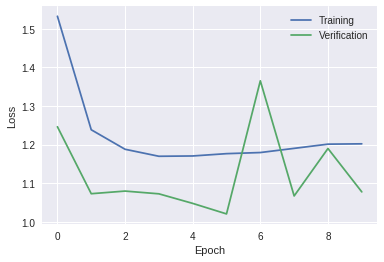

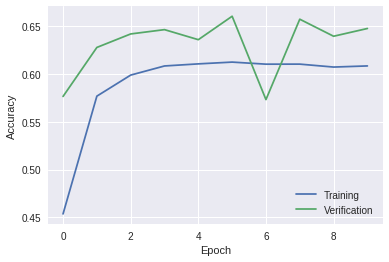

In [39]:
if __name__ == '__main__':
    main()